# Processing task-based FMRI with AFNI and afni_proc.py

**Author**: Paul A. Taylor (SSCC, NIMH, NIH, USA)

**Date**: 11 Nov 2025

### Overview

This tutorial goes through full single-subject processing of task-based FMRI data. It uses AFNI tools, in particular afni_proc.py to setup the full pipeline, which includes several built-in provenance and QC features.  We discuss checking the data at several points, and how the user can stay close to their data to avoid bad surprises (as much as possible). 

This workflow is based on the standard AFNI Bootcamp demo dataset and processing. It looks at task-based FMRI processing for a volumetric, voxelwise analysis in an adult human subject. We note that this pipeline can be tweaked to cover further cases of ROI-based processing, surface-based analysis, non-human subjects and other age groups.

In this workflow, you will see the following programs in action (and we keep using several of the acronyms, for brevity and hipness):
- `gtkyd_check.py` : Get To Know Your Data (GTKYD) by tabularizing and summarizing properties of many datasets efficiently
- `gen_ss_review_table.py` : (GSSRT) sift through textfile-stored properties of many datasets for desired/undesired properties or outliers
- `afni_proc.py` : (AP) create your full, auto-commented FMRI processing pipeline, with built-in QC
- `3dinfo` : quickly check properties of one dataset, including the history of its processing (=provenance)

You will also hear about how the following programs can be run prior to AP, and their results helpfully incorporated. (These are run before because they can be long and computationally expensive, and if you re-run your processing in AP, there likely isn't a need to re-run them.)
- `sswarper2` : (SSW) skullstrip your T1w anatomical and generate nonlinear warps to a template space
- `recon-all` : (from FreeSurfer, FS) estimate parcellations and surface meshes from the T1w anatomical
- `@SUMA_Make_Spec_FS` : an AFNI program run immediately after FS to convert volumes to NIFTI format, surfaces to GIFTI format, to standardize surface meshes, and to create useful `*.spec` files relating surface families.

**Note** that a very, very important part of processing data is visualizing it both before and after processing (and often looking at intermediate results). In this jupyter-notebook interface, it is difficult to open a GUI, so that part will have to be done separately outside of this (e.g., in a concurrent terminal). We will include snapshots as we discuss features, and we very much encourage users to also use the AFNI GUI to view data and a browser to view the APQC HTML.

### Tools and citations relevant for this workflow

* *AFNI the open source, [publicly available](https://github.com/afni/afni) toolbox for MRI-related processing:*  
  Cox RW (1996). AFNI: software for analysis and visualization of functional magnetic resonance neuroimages. [Comput Biomed Res 29(3):162-173.](https://doi:10.1006/cbmr.1996.0014)


* *afni_proc.py, a program to make full, detailed processing pipelines for FMRI datasets:*  
  Reynolds RC, Glen DR, Chen G, Saad ZS, Cox RW, Taylor PA (2024). Processing, evaluating and understanding FMRI data with afni_proc.py. [Imaging Neuroscience 2:1-52.](https://doi.org/10.1162/imag_a_00347)


* *AFNI QC tools including the APQC HTML, tools for evaluating both raw and processed data properties for appropriateness:*  
  Taylor PA, Glen DR, Chen G, Cox RW, Hanayik T, Rorden C, Nielson DM, Rajendra JK, Reynolds RC (2024). A Set of FMRI Quality Control Tools in AFNI: Systematic, in-depth and interactive QC with afni_proc.py and more. [Imaging Neuroscience 2: 1–39.](https://doi:10.1162/imag_a_00246)


* *AFNI QC tutorial examples, part of the [FMRI Open QC Project](https://www.frontiersin.org/research-topics/33922/demonstrating-quality-control-qc-procedures-in-fmri) on demonstrating quality control in FMRI:*  
  Reynolds RC, Taylor PA, Glen DR (2023). Quality control practices in FMRI analysis: Philosophy, methods and examples using AFNI. [Front. Neurosci. 16:1073800.](https://doi:10.3389/fnins.2022.1073800)


And some additional related reading:

* *An earlier discussion of processing choices and using afni_proc.py, with examples:*  
  Taylor PA, Chen G, Glen DR, Rajendra JK, Reynolds RC, Cox RW (2018). FMRI processing with AFNI: Some comments and corrections on ‘Exploring the Impact of Analysis Software on Task fMRI Results’. [bioRxiv 308643](https://doi:10.1101/308643)


* *Why scaling FMRI time series is often a helpful and meaningful processing choice:*  
  Chen G, Taylor PA, Cox RW (2017). Is the statistic value all we should care about in neuroimaging? [Neuroimage. 147:952-959.](https://doi:10.1016/j.neuroimage.2016.09.066)


* *Why do we use lpc and lpa cost functions for alignment?*  
  Saad ZS, Glen DR, Chen G, Beauchamp MS, Desai R, Cox RW (2009). A new method for improving functional-to-structural MRI alignment using local Pearson correlation. [Neuroimage 44 839–848](https://doi:10.1016/j.neuroimage.2008.09.037).


* *Why do we use 3dvolreg for motion correction?*  
  Oakes TR, Johnstone T, Ores Walsh KS, Greischar LL, Alexander AL, Fox AS, Davidson RJ (2005). Comparison of fMRI motion correction software tools. [Neuroimage. 28(3):529-543](doi:10.1016/j.neuroimage.2005.05.058).


* *Why it is important to transparently threshold data to really understand it (in addition to QC issues, noted in above papers):*  
  Taylor PA, Reynolds RC, Calhoun V, Gonzalez-Castillo J, Handwerker DA, Bandettini PA, Mejia AF, Chen G (2023). Highlight Results, Don’t Hide Them: Enhance interpretation, reduce biases and improve reproducibility. [Neuroimage 274:120138](https://doi:10.1016/j.neuroimage.2023.120138).


* *... and in case you needed more convincing on why it is important to transparently threshold data:*  
  Taylor PA, Aggarwal H, Bandettini PA, Barilari M, Bright M, Caballeros-Gaudes C, Calhoun VD, Chakravarty M, Devenyi G, Evans J, Garza-Villarreal E, Rasgado-Toledo J, Gau R, Glen DR, Goebel R, Gonzalez-Castillo J, Gulban OF, Halchenko Y, Handwerker D, Hanayik T, Lauren PD, Leopold D, Lerch J, Mathys C, McCarthy P, McLeod A, Mejia A, Moia S, Nichols TE, Pernet C, Pessoa L, Pfleiderer B, Rajendra JK, Reyes L, Reynolds RC, Roopchansingh V, Rorden C, Russ BE, Sundermann B, Thirion B, Torrisi S, Chen G (2025). Go Figure: Transparency in neuroscience images preserves context and clarifies interpretation. [arXiv:2504.07824](https://arxiv.org/abs/2504.07824/)



### Additional educational resources

Accompanying video tutorials for this processing example, as well as several other topics in MRI data visualization and processing, are available on the AFNI Academy channel: https://www.youtube.com/c/afnibootcamp.

The AFNI handouts directory for the Bootcamp can be downloaded from a terminal shell with:
```
curl -O https://afni.nimh.nih.gov/pub/dist/edu/data/CD/afni_handouts.tgz
tar -xvf afni_handouts.tgz
```
... or see [this webpage](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/educational/handouts.html#download-all-afni-handouts).

Additional educational resources are available [here](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/educational/main_toc.html). 

Questions and comments can be posted on the [AFNI Message Board](https://discuss.afni.nimh.nih.gov/).

# Load and check AFNI installation

Run the following to load the most recent version of AFNI available, and also run the system check to verify the components.

The AFNI system check (ASC) outputs a lot of useful diagnostic information about dependencies and programs. At the bottom is a "Please fix" section, which contains any particular items to address. Any questions can be posted on the [AFNI Message Board](https://discuss.afni.nimh.nih.gov/).

In [1]:
# import some Python packages for this jupyter-notebook tour
import os            # to interact with files and paths
import IPython       # to visualize image files

# load the AFNI module for neurodesk
try:
    import module    # to load neurodesk modules

    # load most recent available AFNI
    await module.load('afni')
    await module.list()
except:
    print("++ Python library 'module' not available")

In [2]:
# run the system check
!afni_system_check.py -check_all

-------------------------------- general ---------------------------------
architecture:         64bit 
cpu type:             x86_64
system:               Linux
release:              5.4.0-204-generic
version:              #224-Ubuntu SMP Thu Dec 5 13:38:28 UTC 2024
distribution:         ubuntu 24.04 Noble Numbat
number of CPUs:       32
user:                 ubuntu
apparent login shell: bash
shell RC file:        .bashrc (exists)

--------------------- AFNI and related program tests ---------------------
which afni           : /usr/local/abin/afni
afni version         : Precompiled binary linux_ubuntu_24_64: Jul  4 2025 
                     : AFNI_25.2.03 'Gordian I'
AFNI_version.txt     : AFNI_25.2.03, linux_ubuntu_24_64, Jul 04 2025, official
which python         : /usr/bin/python
python version       : 3.12.3
which R              : /usr/bin/R
R version            : R version 4.3.3 (x86_64-pc-linux-gnu)

instances of various programs found in PATH:
    afni    : 1   (/usr/local/abi

### Reading the "Please fix" section

There may be some useful things to do, based on the final "summary, please fix" output in the ASC output.

For example, some of the items that commonly occur, and which you should follow-up on, are (NB: some paths may be different on your system):
* `please run: apsearch -update_all_afni_help`  
  -> Sets up the TAB-autocompletion of the options for all the AFNI programs.  
  You then don't have to remember each option name in full (but go ahead and memorize them all instead, if you prefer!)
* `please run: cp /usr/local/abin/AFNI.afnirc ~/.afnirc`  
  -> Sets up default settings file to manage fine control of the AFNI GUI and programs.  
  You then open `~/.afnirc` in a text editor and adjust a lot of settings (such as default colors, left-right settings, directories of reference data to always load, and more).
* `please run: suma -update_env`  
  -> Sets up default settings file to manage fine control of the AFNI GUI and programs.  
  You then open `~/.sumarc` in a text editor and adjust a lot of settings (such as rotation angle per click, various colors, and more).
* `python library <something> is required`  
  -> Points out missing Python module dependency for some AFNI functionality.
  On Linux systems, you might be able to install these directly with the package manager.
  If not, or if using macOS, you might find it useful to add these packages using some form of Conda, like Miniconda, for which we have copy+paste instructions [here](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/background_install/miniconda.html#set-up-conda-quick).

# Get the data

The data used here is part of the standard AFNI Bootcamp teaching data. If you have already downloaded and unpacked the full tutorial data (CD.tgz), you can use those contents. If you don't have that, and would like just the directory containing demo's data (plus other examples) you can run the following to download+unpack it, as well as to move into the demo dir itself:

In [3]:
# download the compressed data directory "AFNI_data7" 
# (if it doesn't already exist and if we are't in the data dir)

have_datadir = os.path.isdir('AFNI_data7')          # demo already downloaded?
in_demodir   = os.getcwd().endswith('task_demo_ap') # alread in demo directory?

if not(have_datadir) and not(in_demodir) :
    # download the compressed data
    !curl -O https://afni.nimh.nih.gov/pub/dist/edu/data/AFNI_data7.tgz
    !echo "++ Done downloading the data"

    # unpack/open the directory
    !tar -xf AFNI_data7.tgz
    !echo "++ Done unpacking the data"
else :
    !echo "++ I appear to already have the data directory. Nice!"
    
# move to the directory with unprocessed data (if not already there)
if not(in_demodir) :
    os.chdir('AFNI_data7/task_demo_ap')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  487M  100  487M    0     0  27.5M      0  0:00:17  0:00:17 --:--:-- 29.5M
++ Done downloading the data
++ Done unpacking the data


# Investigate the demo contents

Let's go check out the demo contents:
* what data files are present
* some of the properties and contents
* what script examples there are

**The starting data directories**  
- **sub-000** : the directory of basic/unprocessed FMRI and anatomical data for this participant
- **SSW** : output directory from running AFNI's `sswarper2`, which skullstrips the participant's anatomical volume and calculates a nonlinear warp to a chosen template space (here, MNI)
- **SUMA** : output directory from running FreeSurfer's `recon-all` and AFNI's `@SUMA_Make_Spec_FS`, which contains anatomical surface meshes and volumetric parcellations

**The demo scripts**
- **do_01_gtkyd.tcsh** : before any processing takes place, run `gtykd_check.py` to Get To Know Your Data (GTKYD), checking for unwanted or inconsistent properties
- **do_12_fs.tcsh** : (*already run*) run FS's `recon-all` to perform cortical mesh estimation, tissue segmentation and region parcellation of the anatomical, stored in `SUMA/`
- **do_13_ssw.tcsh** : (*already run*) run `sswarper2` to skullstrip (ss) the anatomical and estimate nonlinear alignment (warping) of it to a template, stored in `SSW/`
- **do_14_timing.tcsh** : (*already run*) run `timing_tool.py` to convert BIDS-format TSV files into AFNI-format timing files, producing `sub-000/func/times*txt`
- **do_20_ap_simple.tcsh** : a wrapper command for AP which essentially no options besides input data; useful for simple, quick processing (treats data like rest) to generate the APQC HTML and other QC info
- **do_21_ap_affine.tcsh** : a task-based analysis using the stimulus timing info and more control of options; the primary teaching example, it only uses affine alignment of anatomical->template space, for faster processing in class
- **do_22_ap_nonlinear.tcsh** : the same as `do_21*.tcsh` but applying nonlinear warping to template space from `sswarper2` (alrady run, via `do_13_ssw.tcsh`), making it a more real example.
- **do_23_ap_surf.tcsh** : a surface-based processing example, using a mesh estimated with FreeSurfer's `recon-all` (already run, via `do_12_fs.tcsh`)


**... and other stuff**, including what will be created as we run the scripts  
- **README.txt** : description of demo directory contents
- **example_snapshots** : images to support the jupyter-notebook description
- **proc\*** : for provenance, verification and education, AP creates a fully commented script of the complete processing; this gets executed to do the work
- **run\*** : when running the "simple" AP processing, a copy of the command is saved for reference
- **out\*** : for provenance, verification and troubleshooting, we try to execute the `proc*` scripts in a way that logs all terminal text, to these files
- **sub-\*.results** : the results directory from running an AP `proc*` script; contains a lot of intermediate outputs and QC items, to assist verification checks

In [4]:
# display the files present
!ls -1 --color

README.txt
SSW
SUMA
do_01_gtkyd.tcsh
do_12_fs.tcsh
do_13_ssw.tcsh
do_14_timing.tcsh
do_20_ap_simple.tcsh
do_21_ap_affine.tcsh
do_22_ap_nonlinear.tcsh
do_23_ap_surf.tcsh
example_snapshots
save.proc.sub-000.affine
sub-000


**The basic input data: brief overview**  

This example uses a BIDS-ish data structure and set of names for datasets. AP is flexible and happy to use these as inputs.

There is one T1-weighted (T1w) anatomical volume: `anat/sub-000_T1w.nii.gz`. This is a 3D volume, typically of higher spatial resolution than the FMRI data and providing clear anatomical information.

There are 3 EPI-based FMRI datasets, which contain a record of blood oxygen-level dependence (BOLD) signal changes throughout the brain: `func/sub-000_task-av_run-0?_bold.nii.gz`. These were acquired while the subject performed a task (described below), each has a BIDS-formatted record of event timing: `func/*events.tsv`. These are each "4D" datasets, because they have three dimensions of space and one dimension of time. These three runs were all acquired in the same session, so we will process them all together in a single AP command.

The final two text files that contain (most of) the necessary timing information for the task paradigm performed by the subject during the FMRI runs, in a simple format used by AFNI programs: `func/times.*.txt`. Each text file contains the event timing information for one of the two stimulus class types, during this audio-visual task used here: 
- "vis" class: "visual reliable" presentation of a clear image of a person speaking while hearing garbled sound;
- "aud" class: "audial reliable" presentation of a blurred image of a person speaking while hearing clear sound.

In [5]:
# display the contents of the basic input data tree
# (one participant's datasets):
!tree sub-000

sub-000
├── anat
│   └── sub-000_T1w.nii.gz
└── func
    ├── sub-000_task-av_run-01_bold.nii.gz
    ├── sub-000_task-av_run-01_events.tsv
    ├── sub-000_task-av_run-02_bold.nii.gz
    ├── sub-000_task-av_run-02_events.tsv
    ├── sub-000_task-av_run-03_bold.nii.gz
    ├── sub-000_task-av_run-03_events.tsv
    ├── times.aud.txt
    └── times.vis.txt

2 directories, 9 files


**Timing files**

The two stimulus files are: `sub-000/func/times.{aud,vis}.txt`.

In this study, each stimulus event lasted for 20s, and the stimuli were all separated by 10s of "rest" (no sound, no image). The ordering of presented stimuli was random. This style of task presentation is called a "block design", because the events are fairly long. While many modern task paradigms are in a different style with very short (less than a couple seconds) called "event-related", this is useful for understanding BOLD responses---we can actually see the task-related changes in the BOLD signal. FMRI time series are very noisy, so for very short or more subtle tasks this is usually not possible. NB: mathematics makes that OK, and we can still get useful quantities to evaluate, but it is less helpful for a demo.

It is important to know the onset times of each event during the processing, and this information is stored in the `func/times.*.txt` files. It is also important to know the duration of each event. In this case, it is a constant 20s, and we just know that we need to remember and provide that number during the AP setup. If the event durations differed, that would be recorded in the timing files.

The format of these timing files is as follows:
- there are N rows of text, corresponding to each of the N runs of data (here, N=3).
- within a row, each number corresponds to the onset time of a given event
- each onset value is the time (in seconds) from the start of the FMRI dataset that is being processed
  - the onset times here happen to be integers, but they don't need to be; they don't even need to fall on a TR
  - if part of processing includes removing initial volumes from the FMRI dataset (like to remove pre-steady state), the timing values need to count from the post-trimmed values---*so be sure to account for that in your timing file creation?*
  - if an FMRI run had no events, you could put just `* *` in that row to signify that it is empty

You can see the compact contents of the timing files as in the next cell (and similarly for the vis class).

In [6]:
# display the timing file for the "aud" stimulus class
!cat sub-000/func/times.aud.txt

0.0 30.0 150.0 210.0 270.0 
0.0 30.0 60.0 90.0 240.0 
30.0 90.0 180.0 210.0 270.0 


### *Visualization note*

At this point, we reiterate that it is generally useful to visualize your datasets, particularly if they are recently scanned or downloaded. You can learn so much about a dataset's properties, suitability for an analysis and potential pitfalls to look out for. This qualitative information gathering will be complemented by quantitative ones, too, described below.

**Anatomical volume**

This volume provides useful structural and anatomical information for the participant, since it is much less distorted than the EPI-based FMRI dataset(s) and has better tissue contrast. 

This can best be appreciated by visualizing the anatomical in AFNI:  
- Open the AFNI GUI, loading all dsets recursively in the source data dir: `afni -R -all_dsets sub-000`
- Anatomical may be default dset, or click "Underlay" -> "sub-000/anat/sub-000_T1w.nii.gz" -> "Set"
- Navigate the crosshairs to the coordinate origin of the dset:
  - AFNI uses (x, y, z) coordinates (physical units of mm) for locations
  - Coordinates are shown in the upper left corner, in RAI sign convention (Right/Ant/Inf are negative)
  - In any image window, right-click -> "Jump to (xyz)" -> enter `0 0 0` -> Set
  - NB: actual location will be voxel centroid closest to coordinate origin.
  
A screenshot of the described GUI setup is shown, below.  

NB: this dataset has not been defaced/refaced (and is shared with the scanner participant's permission!), but that could be done in AFNI with [@afni_refacer_run](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/tutorials/refacer/refacer_run.html), which has been rated a [top defacing/refacing tool in independent comparisons](https://www.frontiersin.org/articles/10.3389/fpsyt.2021.617997/full).

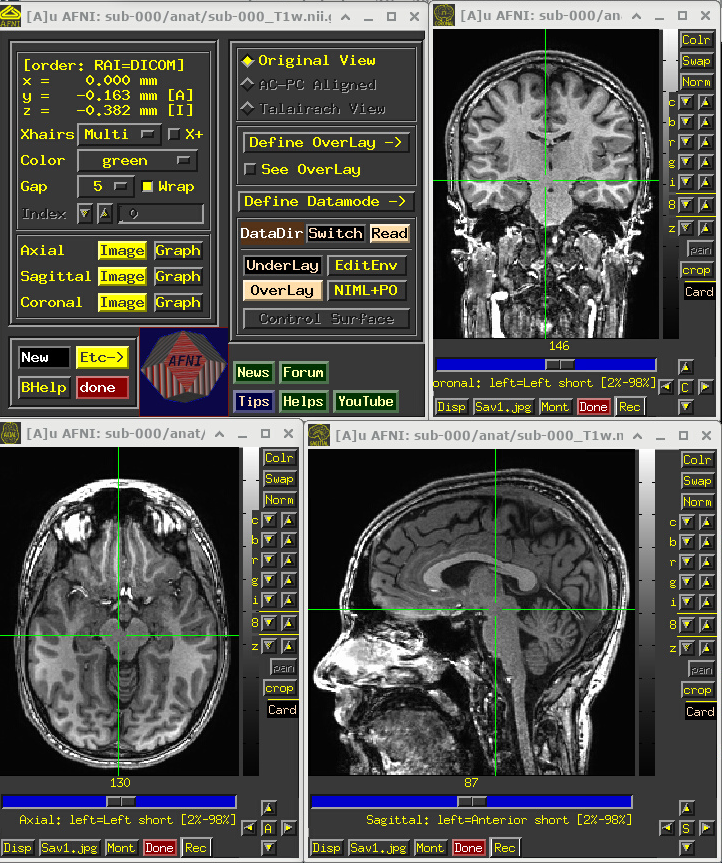

In [7]:
# Display a screenshot of the AFNI GUI with the T1w anatomical loaded
IPython.display.Image(filename='example_snapshots/img_00_afnigui_anat_000.png') 

One would check the anatomical dataset for appropriate coverage, spatial resolution, tissue contrast, and other desired properties.

At some stages of processing, the following steps usually happen with this T1w dataset:
1. It is skullstripped to identify just the brain part within the FOV.
2. A single volume from the FMRI data is aligned to it, for structural and anatomical reference.
3. In many volume-based studies, it may be aligned to a template volume, to have all data in the same reference space (typically done with nonlinear warping, in a real analysis).
4. In surface-based studies, a surface mesh will be estimated from this volume, to project data onto (in AFNI, this mesh is standardized).

In standard AFNI processing, Items \#2 and 3 are typically performed prior to running AP (simultaneously using AFNI's `sswarper2`), and then relevant data are provided via options. Indeed, we have done that prior anatomical processing here, with the `SSW` directory (discussed above) containing the `sswarper2` outputs.

Additionally, Item \#4 would also typically be performed before running AP (using FS's `recon-all`), and the relevant data are provided via options. We have done so here, with the `SUMA` directory (discussed above) containing the `recon-all` outputs.

**FMRI volumes**

FMRI volumes don't have the high spatial resolution of anatomical datasets---they are typically 2-3mm per edge---but they are acquired in a way to provide a time series-view of what is happening every couple seconds (a typical TR is about 2s). The standard scan technique for acquiring FMRI is called echo planar imaging (EPI), and we use the terms interchangeably here.

Again, we can appreciate some properties of the EPI dataset best by visualizing it in AFNI (the first step repeats from above, so you can skip it if the GUI is still open):  
- Open the AFNI GUI, loading all dsets recursively in the source data dir: `afni -R -all_dsets sub-000`
- To select the first run of EPI data, click "Underlay" -> "sub-000/func/sub-000_task-av_run-01_bold.nii.gz" -> "Set"
- Open a Graph Viewer by clicking the "Graph" button in the GUI (left panel, next to a yellow Image button; we chose the graph in the Sagittal slice)
- Navigate the crosshairs to the coordinate origin of the dset:
  - AFNI uses (x, y, z) coordinates (physical units of mm) for locations
  - Coordinates are shown in the upper left corner, in RAI sign convention (Right/Ant/Inf are negative)
  - In any image window, right-click -> "Jump to (xyz)" -> enter `0 0 0` -> Set
  - NB: actual location will be voxel centroid closest to coordinate origin.
  
A screenshot of the described GUI setup is shown, below.

In the Image panels, you see a fuzzy-looking brain, with some cortical patterns visible, but tissue boundaries and regions probably aren't as obvious as in the anatomical dataset view, above.

In the Graph panel, you are seeing a montage of time series from a (default) 3x3 grid of voxels in the given sagittal slice. In this subcortical region, the time series have a lot of fluctuations and don't have a recognizable pattern.

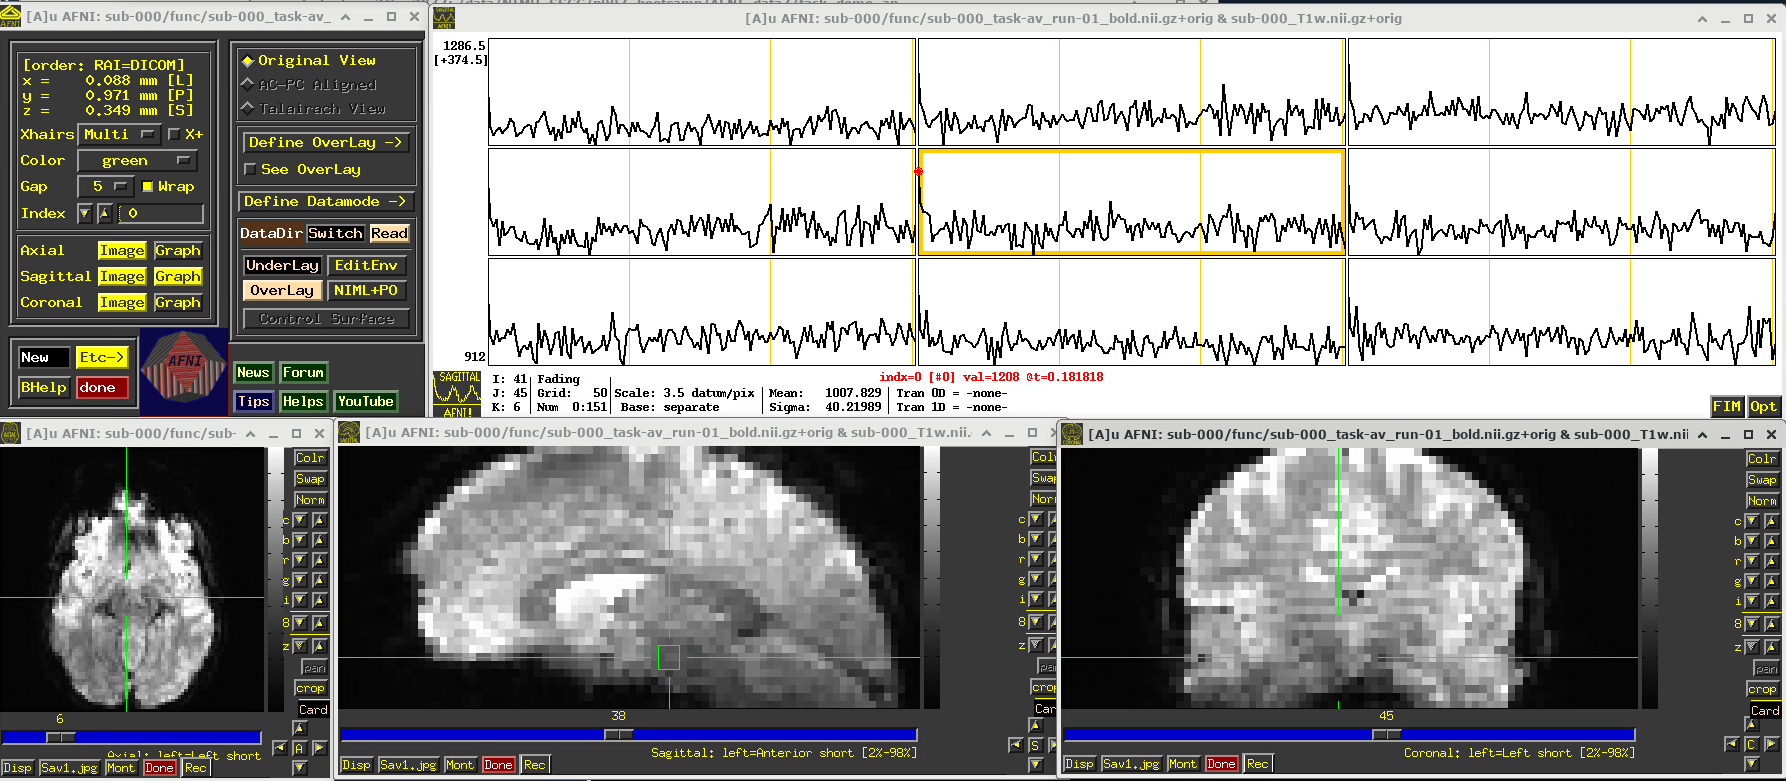

In [8]:
# Display a screenshot of the AFNI GUI with the first EPI run loaded, seen at coordinate origin
IPython.display.Image(filename='example_snapshots/img_01_afnigui_epi_r01_000.png') 

*EPI feature: spikes*

Click around and see how different parts of the brain appear. For example, if you end up at the location (x,y,z) ~ (8, 31, 60), you will see some spikes that are *very* big relative to the other fluctuations. These are due to a subject motion event about a quarter of the way through the run. 

Some spikes are up, some are down, and some time series don't appear to have any. This heterogeneity of motion-induced spikiness is one major reason why participant motion is so hard to navigate well in processing and analysis.

Up above, and here as well, you might also notice a subtle thing that appears in all time series at their very start---a different kind of spike. (It is hiding a bit, because of the y-axis there, but look closely.) This one is different because it is *always* upwards, uniformly. This has a different root cause. Each dataset *looks* normal there as a 3D volume, but in fact the recorded values are uniformly higher in the first few volumes than the rest---this is a "pre-steady state" phenomenon. It occurs generally in FMRI as the acquisition sequence settles into a steady state. Some scanners or initial data-streams clip out these time points, while others don't. It is good to be aware that these can occur. 

You can tell afni_proc.py to remove the first few EPI volumes, if the input data *does* include such pre-steady state volumes. And afni_proc.py will automatically check and warn you if it appears that the user did not account for some pre-steady state volumes that appear to be present. (And we note that participant motion *can* occur in the first few volumes, so sometimes it is hard to tell which affect might be happening, or if both are.) In any case, you need to make sure that your task-based timing files stay synchronous with the EPI datasets as processed!

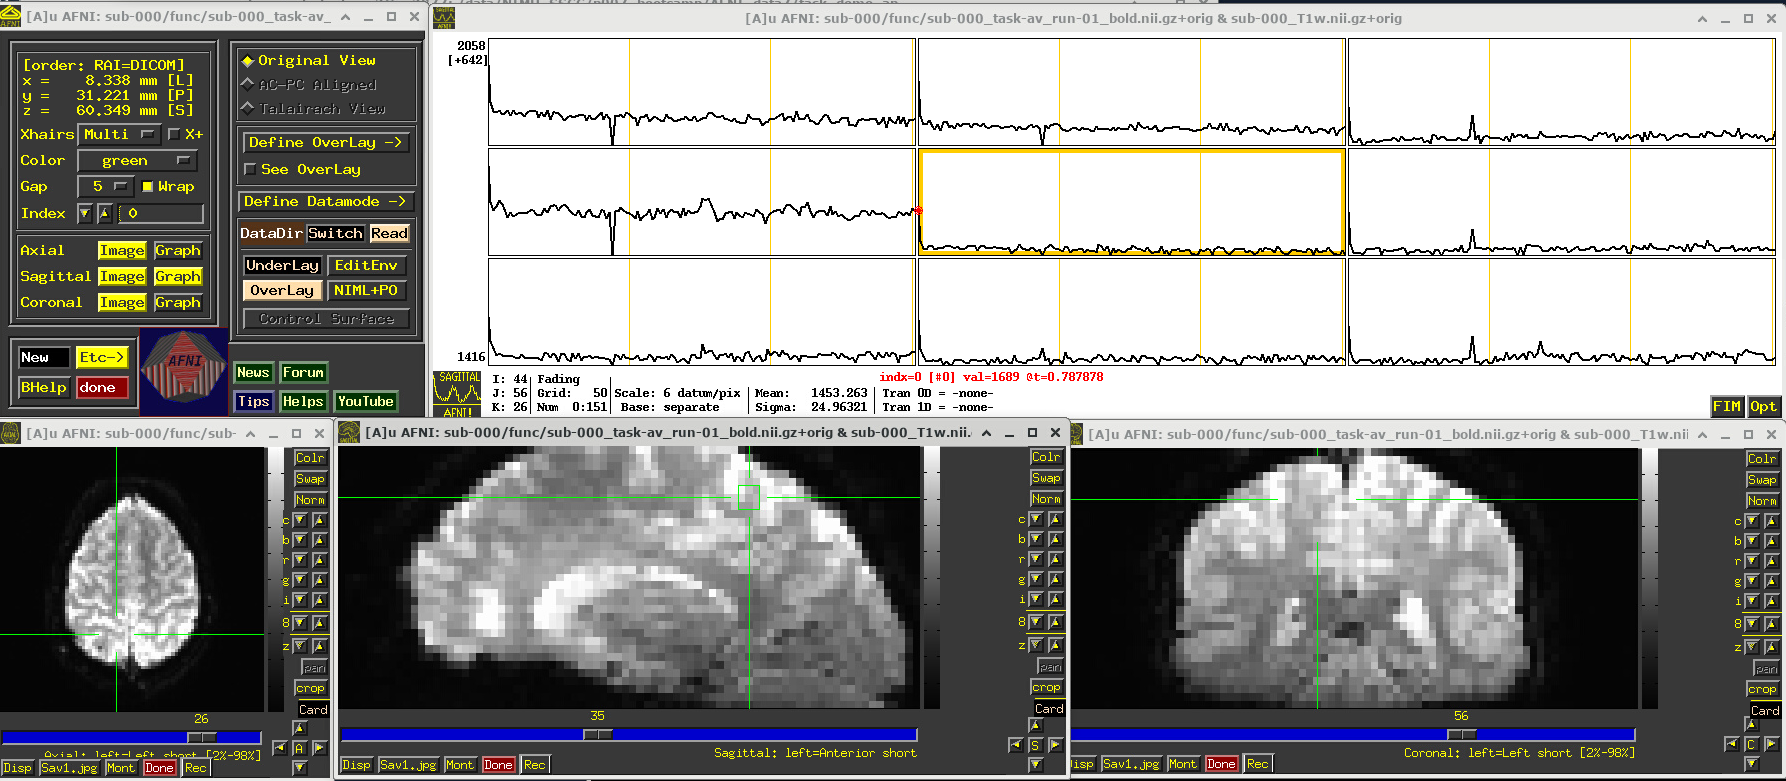

In [9]:
# Display a screenshot of the AFNI GUI with the first EPI run loaded, checking out spikes
IPython.display.Image(filename='example_snapshots/img_02_afnigui_epi_r01_spikes.png') 

*EPI feature: task response*

The task performed during this FMRI scan was an audio-visual one. So, let's check out how things look in the visual cortex.  Well, see see some notable patterns, such as at the location (x,y,z) ~ (16, 78, 3.3), as below. While the earlier-noted motion and pre-steady state spikes apparent, we now see some very regular pattern of hills. And indeed, these are signatures of task-related BOLD response for this block design paradigm (we could load the idealized response time series into the graph viewer, too, to help verify this). 

Specifically, this paradigm has the start of a block that contains either a blurred or clear visual component every 30s and a duration of 20s, so seeing regular response in the visual cortex is not unexpected. The fact that we see a few time series in this graph montage with the task signature reflects our spatial sampling: the voxel edges are roughly the same diameter as GM cortex. Notice also that the response shapes aren't perfectly rectangular---the BOLD response is not on/off, but has a ramp up and ramp down---and that notable plus/minus noise bumps are still present.

Later, we will look at performing real processing to get a more detailed description of task responses: quantifying each stimulus class, perhaps comparing them (i.e., evaluating their "contrast"), trying to boost their signal-to-noise ratio while also reducing spikes and other noise features. That is the job of the real processing.

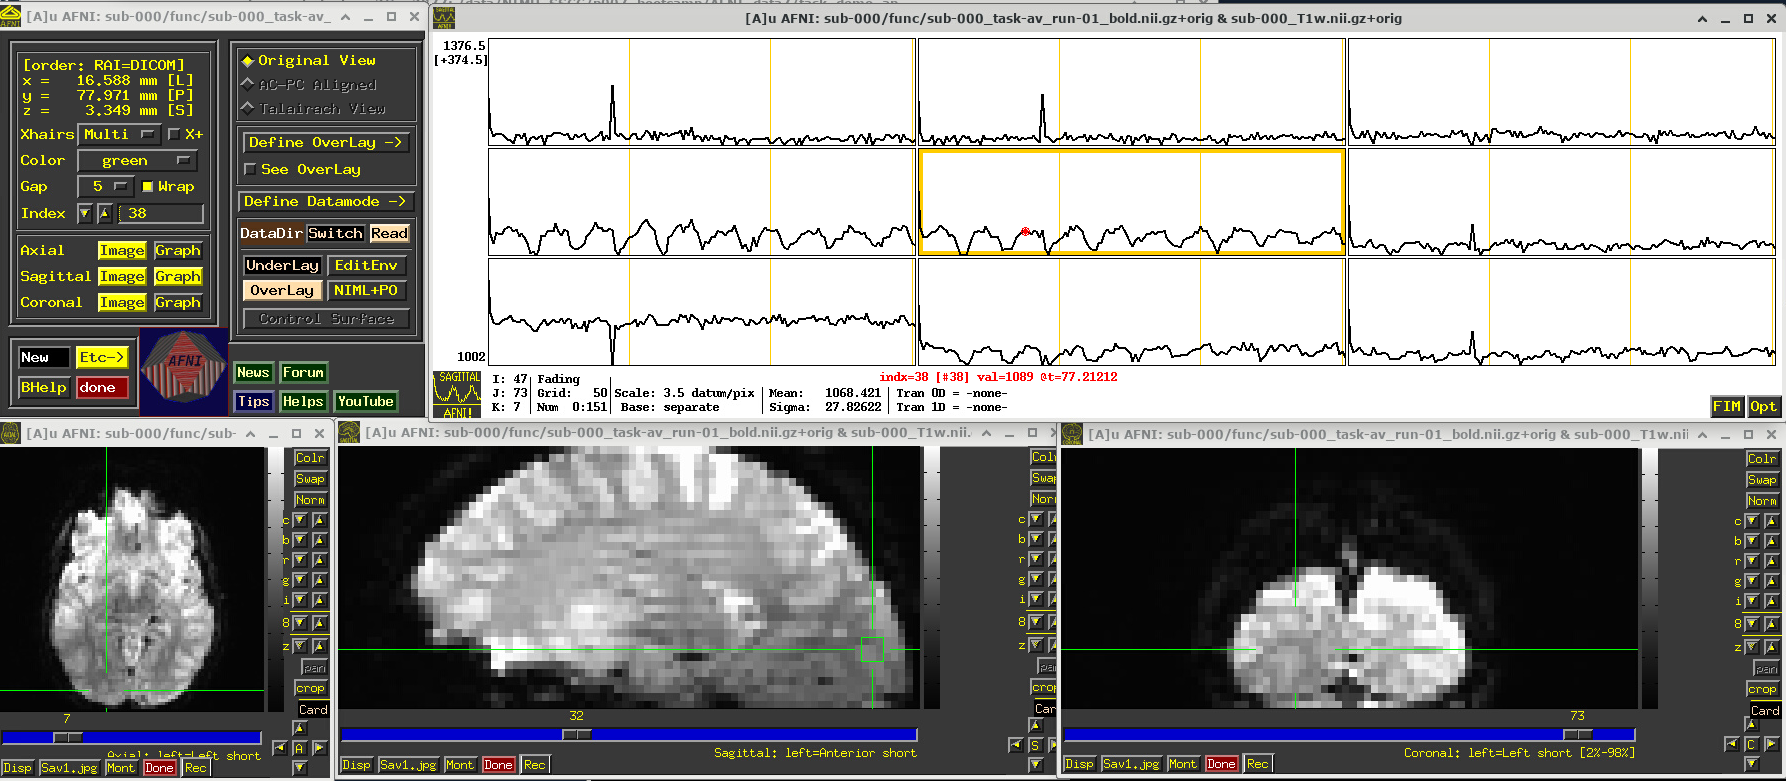

In [10]:
# Display a screenshot of the AFNI GUI with the first EPI run loaded
IPython.display.Image(filename='example_snapshots/img_03_afnigui_epi_r01_taskresp.png') 

*FMRI comments*

FMRI datasets are useful windows into the whole brain, at reasonable spatio- and temporal resolutions. As with any modality, it has pluses and minuses and trade-offs to consider.  

First, these are some key pluses:
- **MR safety:** MRI and FMRI are generally considered quite safe, because the electromagnetic frequencies involved are in the radio range. So, there are not concerns of ionizing radiation, and some people have literally had hundreds of scans performed on them without adverse consequences.
- **Noninvasive:** Standard FMRI is noninvasive, in that no cutting or insertion of devices is needed, and no contrast agents or dyes need to be ingested. 
- **Reasonable spatial resolution:** We can acquire FMRI datasets with typical voxels edge lengths of 2-3mm.  This allows researchers to resolve functional gray matter regions at a useful scale.
- **Reasonable temporal sampling:** We can acquire repeated whole brain volumes at a typical rate of every 1-2s. This allows researchers to study functional changes at a useful time sampling. 
- **Whole brain:** While MEG and EEG have much higher temporal sampling (order of ms), FMRI provides better spatial resolution and localization, as well as the ability to view into to the interior depths of the brain.
- **Length of scan:** Participants can stay in the scanner safely for a long time, so one can acquire a lot of functional data, either from a single or multiple runs. However, one must balance duration with participant comfort, ability to perform the task reasonably (e.g., not getting bored, falling asleep, failing to respond, learning task too well, etc.). There are also practical considerations of coil heating and baseline changes over time, that can make regression modeling more difficult.
- **Flexible task design:** A large number of tasks can be performed by the participant in the scanner, allowing researchers to focus on different aspects of brain function. This includes reading, viewing images/movies, finger tapping/button pushing, imagining, neurofeedback, resting, and much more.
- **Reasonable signal strength:**  While the measured BOLD data have a lot of non-neuronal sources that contribute both structured and unstructured noise, we can still observe useful BOLD signals to work with.

... and also some challenging considerations:
- **Tight voxel sampling:** Considering spatial scales, EPI voxel edges are generally about the same length as the human cortical ribbon. This means we are not deeply sampling the GM as we would want, leading to partial voluming (mixing GM, WM and CSF) of information within a voxel.
- **Sensitivity to motion:** FMRI is highly, highly, highly susceptiple to motion by the participant, even at annoyingly small amounts like <0.5 mm. This makes it difficult to acquire reasonable data for many patient populations, or for certain tasks that might induce motion, or for very long runs. Limiting motion, esp. task-correlated motion, is one of the primary arts of study design and data acquisition; post-processing can only do so much to reduce its impact. There will be up and down spikes inserted into many time series, as well as the fact that a given time series will gather signals from different parts of the brain.
- **Geometric distortions:** EPI is highly susceptible to geometric distortions. Along the "phase encoding" axis (which is generally along the anterior-posterior axis), one edge of the brain will get stretched out and signals attenuated and the other squashed with signals piled-up.
- **BOLD measures:** FMRI measures an indirect quantity---blood oxygenation level dependent (BOLD) responses---that arises from the neuronal firing which we are *actually* most interested in. There are many other sources of BOLD fluctuations, such as breathing and heartrate, and other noise sources due to the physics of the acquisition and practical realities of scanning live participants (like motion). So, we need to take this into account for our processing, modeling and interpretations. Oh, and BOLD measures have no physical units, making interpretation more challenging (but we can navigate this a bit in processing).
- **Poor tissue contrast:** In general, EPI datasets are a bit fuzzy and it can be hard to distinguish where tissue boundaries end/start. (This is one reason for acquiring a higher-resolution anatomical, to give a better map of what is what in the brain).
- **Brightness inhomogeneity:** EPI signals are often not homogeneous across the brain or a given tissue type, meaning that the baseline measures might be higher in one patch than another. Typically, parts of the brain physically closer to MRI coils have higher signal, meaning the edges are very bright. Like the challenge with not having BOLD measures, this is something we don't want to affect final analyses, and we try to account for this in processing.
- **FMRI signal strength:** FMRI data are very noisy, in the sense that there are many non-BOLD sources with large magnitudes mixed into the data. This is often quantified via the temporal signal to noise ratio (TSNR). But more generally this means we often need many events of a task-based design, and generally acquire multiple partipants to be able to generalize robust results for more subtle questions of interest.
- **Signal loss:** EPI signal will often get lost near boundaries with air, so the part of the brain near the sinuses will get very distorted and low-strength; this greatly affects the inferiofrontal regions and ventromedial prefrontral cortex (VMPFC).
- **Slicewise acquisition:** The full EPI volume is not acquired in a single snapshot, but instead slice-by-slice over the full duration of the TR; even more interestingly, to reduce signal mixing across slices this is done *every other slice*, so a voxel's "upstairs" and "downstairs" neighbors are often about TR/2 seconds out of sync.
- **Field of view considerations:** Voxels at the very edge of the FOV are typically distorted, so some slices of "padding" should be included around areas of interest. Sometimes to have smaller voxels or shorter TR, researchers trim the coverage and don't acquire some parts of the brain, like the cerebellum.
- **Time-space trade-offs:** To get better time sampling (shorter TR), researchers could decrease spatial resolution (larger voxel sizes). Trimming the FOV (note above) can be used to improve either.
- **Multiband and slice acceleration:** To increase spatial and/or temporal resolution, researchers can use acquisition tricks, like acquiring multiple (non-neighboring) slices simultaneously or subsampling within a slice. These can provide benefits, but they will also provide increasing distortions so that one has to make sure that the trade-off remains reasonable for data usage.

In the end, there are many considerations when designing an experiment. We will highlight subject motion as one that should be limited as much as possible from the beginning, with acclimating participants to MRI scanners and the FMRI task and careful study design. Geometric distortions will *always* be present, participant motion will be a problem, the asynchrony of FMRI slices can be an issue, and our data of interest are an indirect measure of neuronal activity, gathered in a noisy environment.  These facts influence many aspects of our processing, which therefore may include:
1. Cross-EPI alignment to a reference time point, which helps with a couple things:
   - try make it look more like the brain didn't move during the scan, so that each voxel's time series is from a consistent location
   - provides time series estimates of relative motion (3 translation and 3 rotation), which can be used as regressors in time series modeling as well as to censor out time points where "too much" motion occurred
   - ... in general, these are referred to as "motion correction", though we can never get rid of all of these affects.
2. Because motion can put in somewhat arbitrary spikes into time series, one can perform de-spiking to try to reduce their impact and spread.
3. In AFNI, we generally recommend scaling each time series by its mean value, transforming the unitless data into a meaningful "BOLD percent signal change". This also helps reduce the effects of spatial brightness inhomogeneity.
4. To synchonize the data within a volume, one can perform slice-timing correction (or time-shifting), if one has the information of the slice timing pattern.
5. To reduce geometric distortions, one can acquire a short, supplemental dataset to unwarp the EPI: 
   - A short reverse phase-encoded dataset, which is aligned to the main EPI and the "half-way" point of the matching is considered more fiducial to the actual brain
   - A phase map, which should encode the B0 field inhomogeneity that actually causes the distortion, and hence can be applied inversely to unwarp
6. Blurring the data will reduce spatial resolution further, but it can provide a way to boost signal TSNR, with the idea that random noise cancels out a bit while neighboring signal reinforces. Doing this on a surface may provide the best boost.
7. Regression modeling includes a lot of options for dealing with motion, task design, BOLD response and more. It is something to consider from the beginning in the study design.

**Checking dataset properties**

A lot of features have to be verified to help ensure that the data at hand are as appropriate as possible for the current study. Above we have looked at some important visualization aspects of how the data look. We want to be sure to partner that with some investigation of their "meta-data" or "header" features.

One simple way to do that is to check the header information directly, using **3dinfo**.  You can display the full header information directly by just providing a dataset name, as below.

In doing so, we see a lot of properties. Ignoring some of the ones at the top of the output for the moment, we focus on seeing things like:
- the stored dataset orientation on disk (`[-orient RAI]`), 
- the size of the voxels (`2.75 mm... 2.750 mm... 3.000 mmm`), 
- the number of volumes (`Number of time steps = 152`), 
- the TR (`Time step = 2.00000s`), 
- the min-max range for each volume (`0 to    3272`, etc.),  

... and more.  

An important and unique feature in AFNI is seeing the stored **history** for the dataset. As AFNI commands are run, each is saved in an accumulating list in a file, so you can be sure of what steps have happened. The history also notes the version of AFNI used, the time stamp and the computer name. Having this kind of *provenance* during processing is extremely useful in general. (Here, this dataset was just copied twice, basically since the author of this was indecisive about the best name and also wanted to keep a long filename as short as possible.)

As a second example below, we show how you can output one or more specific pieces of the header info with one or more options. This can be very useful for scripting. You can also output information for more than one dataset at a time, which can be useful for checking consistency (more on another tool for comparing conveniently on a larger scale, below). When inputting multiple datasets, I like to include `-prefix` so I know which attributes go with with one.

In [11]:
# display full header information for a dataset
!3dinfo sub-000/func/sub-000_task-av_run-01_bold.nii.gz

++ 3dinfo: AFNI version=AFNI_25.2.03 (Jul  4 2025) [64-bit]

Dataset File:    /home/jovyan/Git_repositories/example-notebooks/books/functional_imaging/AFNI_data7/task_demo_ap/sub-000/func/sub-000_task-av_run-01_bold.nii.gz
Identifier Code: AFN_KSEjKVq0xkBQoe5qpDpMrw  Creation Date: Wed Sep  3 17:17:28 2025
Template Space:  ORIG
Dataset Type:    Echo Planar (-epan)
Byte Order:      LSB_FIRST {assumed} [this CPU native = LSB_FIRST]
Storage Mode:    NIFTI
Storage Space:   64,204,800 (64 million) bytes
Geometry String: "MATRIX(2.75,0,0,-112.6622,0,2.75,0,-122.7787,0,0,3,-17.65058):80,80,33"
Data Axes Tilt:  Plumb
Data Axes Orientation:
  first  (x) = Right-to-Left
  second (y) = Anterior-to-Posterior
  third  (z) = Inferior-to-Superior   [-orient RAI]
R-to-L extent:  -112.662 [R] -to-   104.588 [L] -step-     2.750 mm [ 80 voxels]
A-to-P extent:  -122.779 [A] -to-    94.471 [P] -step-     2.750 mm [ 80 voxels]
I-to-S extent:   -17.651 [I] -to-    78.349 [S] -step-     3.000 mm [ 33 voxels]

In [12]:
# display specific pieces of info and for multiple datasets
!3dinfo -tr -orient -prefix sub-000/func/sub*bold.nii.gz

2.000000	RAI	sub-000_task-av_run-01_bold.nii.gz
2.000000	RAI	sub-000_task-av_run-02_bold.nii.gz
2.000000	RAI	sub-000_task-av_run-03_bold.nii.gz


**Checking dataset properties on a large scale**

Using 3dinfo is great for individual or a small number of datasets, but it is also nice to able to summarize and check properties across a large number of datasets---even across multiple subjects. That can be useful for checking consistency, as well as sifting through for potentially unwanted/odd properties in datasets.

Therefore, AFNI has the **gtkyd_check.py** program, for Getting To Know Your Data. This will gather together lots of pieces of header information: both those from AFNI's BRIK/HEAD and, if the dataset type is NIFTI, then NIFTI; in modern code, it can even query the existence and values of JSON sidecar keys that may be present. In the example here, we look at applying it to the 3 EPI datasets for sub-000, but in general we would probably apply it across all `sub-*` in a study.

The basic usage is to provide a set of input datasets, and then an output prefix. It probably makes most sense to run this across a single kind of dataset, like all EPIs that might be considered in a group together, and then separately across all anatomicals for that group. That will make consistency checks for voxel size and other features more reasonable. 

In the demo script `do_01_gtkyd.tcsh`, the following is the first gtkyd_check.py command, to make a summary table and a set of supplementary text files for the EPI datasets here:
```
gtkyd_check.py                                            \
    -infiles           sub-000/func/sub-*task-av*nii*     \
    -outdir            data_01_gtkyd/all_epi
```

This creates the following outputs in the data_1_gtkyd directory:
- `all_epi.xls` : a spreadsheet where there is 1 row per file, and each column is one of the header properties of interest
- `all_epi` : a directory of supplementary text files; we will use `all_epi/dset*.txt` for a follow-up command shortly

In [13]:
# run a script of gtkyd_check.py and follow-up gen_ss_review_table.py 
# commands on both EPI and anatomical datasets (if not run already)


# Run GTKYD only if output folder does not exist
if not os.path.exists('sub-000.gtkyd'):
    os.makedirs('sub-000.gtkyd')
    !tcsh do_01_gtkyd.tcsh


++ Generate: make table+supplements of properties from FMRI dsets

++ Have 3 dsets to check
++ Making new output directory: sub-000.gtkyd/all_epi
++ Now starting to Get To Know Your Data...
++ ---------------------------
++ DONE. See the outputs:
   group summary table       : sub-000.gtkyd/all_epi.xls
   group detailed values     : sub-000.gtkyd/all_epi/rep_gtkyd_detail_*.dat
   group unique values       : sub-000.gtkyd/all_epi/rep_gtkyd_unique_*.dat
   individual value lists    : sub-000.gtkyd/all_epi/dset_*.txt

++ Review: query for specific data properties that we want to avoid

== outlier test: tr VARY_PM 0.001
** invalid comparison, 'VARY_PM'   should be in: SHOW, VARY, EQ, NE, LT, LE, GT, GE, ZLT, ZLE, ZGT, ZGE




... and on the command line, one could open the created spreadsheet of EPI dataset properties created by gtkyd_check.py with, for example:
```
afni_open -s sub-000.gtkyd/all_epi.xls
```

This is shown below. The first set of properties are from 3dinfo ("n3" is the 3D matrix dimensions; "nv" is the number of volumes; and see the program [help](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/programs/alpha/3dinfo_sphx.html) for further descriptions). Since the dataset format is NIFTI, further checks for NIFTI-specific header properties are checked ("datatype" is a code for being short/float/etc.; "sform_code" is a numeric coding of the space being original/template/etc.; and see the nifti_tool's [help](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/programs/alpha/nifti_tool_sphx.html) for further descriptions).

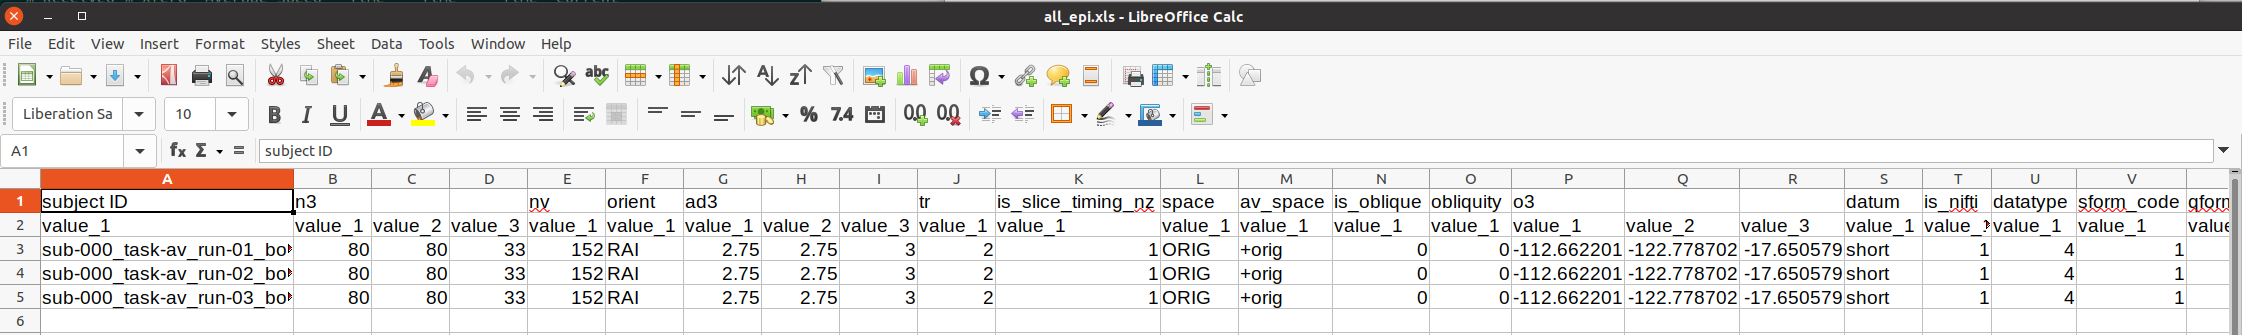

In [14]:
# Display a screenshot of the spreadsheet of EPI properties created by gtkyd_check.py
IPython.display.Image(filename='example_snapshots/img_05_gtkyd_xls_epi.png') 

It is possible to scan columns for consistency or unexpected values, but it is also nice to let the computer do that work for you. The AFNI program **gen_ss_review_table.py** can effectively query the values columnwise for
- comparisons: does any dataset have a voxel dimension >=2.8 mm? are any TRs <= 1.5s? etc.
- exact variations: is the matrix size of any dataset different than the rest? 
- variations with plus/minus tolerance: do voxel sizes vary, outside of floating point roundoff?
- equality: is any participant's raw data somehow labeled as being in a template space?
and more.  Please see the program's [help](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/programs/alpha/gen_ss_review_scripts.py_sphx.html) for further description.

This program queries text files in a simple dictionary format (colon-separated columns, or JSON). Fortunately, gtkyd_check.py is aware of this fact and has created a set of these for datasets it received as input---these were the `all_epi/dset*.txt` files alluded to, above. In the demo script `do_01_gtkyd.tcsh`, the following is the first gen_ss_review_table.py command, to make a small table of any datasets that have a particular property we were interested in, such as variable voxel dimension or a short TR, etc.:
```
gen_ss_review_table.py                                    \
    -outlier_sep space                                    \
    -infiles            sub-000.gtkyd/all_epi/dset*txt    \
    -report_outliers    'subject ID'     SHOW             \
    -report_outliers    'av_space'       EQ    "+tlrc"    \
    -report_outliers    'n3'             VARY             \
    -report_outliers    'nv'             VARY             \
    -report_outliers    'orient'         VARY             \
    -report_outliers    'datum'          VARY             \
    -report_outliers    'ad3'            VARY_PM 0.001    \
    -report_outliers    'tr'             VARY_PM 0.001    \
    -report_outliers    'ad3'            GE   2.8         \
    -report_outliers    'tr'             LE   1.5         \
    |& tee              sub-000.gtkyd/all_epi_gssrt.dat
```
NB: since this program outputs text to the terminal, the `|& tee ...` part at the end is to store a copy of the output terminal text into the given `*.dat` text file, for later readability.

If we display the contents of that text file (see below), we see that there are a lot of columns (because we checked a lot of properties) and in fact there were datasets that were a "hit" for at least one of the given criteria.  If we can view the full `*.dat` file clearly, we see that one voxel dimension for each EPI dataset was >=2.8 mm, and so it would output in the table.

Note, in this case, we aren't really worried about that property, but for example purposes we used that criterion to have *something* be output.

In [15]:
!cat sub-000.gtkyd/all_epi_gssrt.dat

== outlier test: tr VARY_PM 0.001
** invalid comparison, 'VARY_PM'   should be in: SHOW, VARY, EQ, NE, LT, LE, GT, GE, ZLT, ZLE, ZGT, ZGE




### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [16]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-12-05T04:00:12.724445+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython: 8.16.1

